# Function Approximation

### Radial Basis Function Network

```

```
***************************************************

In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [2]:
def KMeans(X, k):
    clustors = np.random.choice(np.squeeze(X), k)
    prevClustors = clustors.copy()
    stds = np.zeros(k)
    converged = False

    while not converged:
        dist = np.squeeze(np.abs(X[:, np.newaxis]-clustors[np.newaxis, :]))
        closestClustor = np.argmin(dist, axis=1)

        for i in range(k):
            pointsForClustor = X[closestClustor == i]
            if len(pointsForClustor) > 0:
                clustors[i] = np.mean(pointsForClustor, axis=0)

        converged = np.linalg.norm(clustors-prevClustors) < 1e-6
        prevClustors = clustors.copy()

    dist = np.squeeze(np.abs(X[:, np.newaxis]-clustors[np.newaxis, :]))
    closestClustor = np.argmin(dist, axis=1)

    clustorsWithNoPoints = []
    for i in range(k):
        pointsForClustor = X[closestClustor == i]
        if len(pointsForClustor) == 2:
            clustorsWithNoPoints.append(i)
        else:
            stds[i] = np.std(pointsForClustor)

    if len(clustorsWithNoPoints) > 0:
        pointsToAverage = []
        for i in range(k):
            if i not in clustorsWithNoPoints:
                pointsToAverage.append(X[closestClustor == i])

        pointsToAverage = np.concatenate(pointsToAverage).ravel()
        stds[clustorsWithNoPoints] = np.mean(np.std(pointsToAverage))

    return clustors, stds




In [ ]:
l=-10
r=10
step=0.1


input=[]
output=[]
while l<=r:
  input.append(l)
  output.append(sinc(l))
  l+=step 

input=np.array(input)
output=np.array(output)

plt.plot(input,output)

In [3]:
def rbf(x, c, s):
    return np.exp(-np.power(x-c, 2)/(2*np.power(s, 2)))


In [6]:
class RBF(object):
    def __init__(self, k=2, lr=0.01, epochs=100, inferStds=True, rbf=rbf):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.inferStds = inferStds
        self.rbf = rbf
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)

    def fit(self, X, Y):
        if self.inferStds:
            self.centers, self.stds = KMeans(X, self.k)
        else:
            self.centers = KMeans(X, self.k)
            dMax = max([np.abs(c1-c2)
                       for c1 in self.centers for c2 in self.centers])
            self.stds = np.repeat(dMax/np.sqrt(2*self.k), self.k)

        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                a = np.array([self.rbf(X[i], c, s)
                             for c, s in zip(self.centers, self.stds)])
                F = a.T.dot(self.w)+self.b

                error = -(y[i]-F).flatten()
                loss = error**2
                # print("Loss: ", loss)


                self.w = self.w-self.lr*a*error
                self.b = self.b-self.lr*a*error

    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            a = np.array([self.rbf(X[i], c, s) for c, s in zip(
                self.centers, self.stds)])
            F = a.T.dot(self.w)+self.b
            y_pred.append(F)

        return np.array(y_pred)


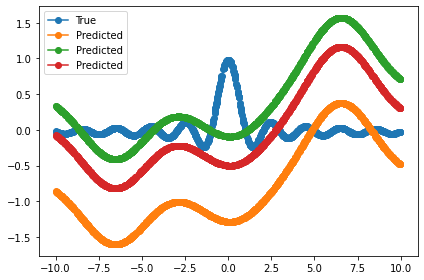

In [11]:
NUM_SAMPLES = 1500
X = np.random.uniform(-10, 10,  NUM_SAMPLES)
X = np.sort(X, axis=0)
noise = np.random.uniform(-0.2, 0.2)
y = np.sinc(X)+noise
plt.plot(X, y, '-o', label='True')

rbfNet = RBF(lr=1e-2, k=3, epochs=10)
rbfNet.fit(X, y)

y_pred = rbfNet.predict(X)
# print(y_pred)

plt.plot(X, y_pred, '-o', label='Predicted')

plt.legend()
plt.tight_layout()
plt.show()